In [1]:
# Load various imports
import numpy as np
import pandas as pd
import os
import librosa
import ast

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

import joblib

Using TensorFlow backend.


### Função para extrair MFCCs de um ficheiro de áudio:

In [2]:
new_featuresdf = pd.read_csv("13MFCCs.csv", sep="|")

In [3]:
def convert_to_list(row):
    return ast.literal_eval(row.feature)
new_featuresdf['feature'] = new_featuresdf.apply(convert_to_list, axis=1)

In [4]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_featuresdf.feature.tolist())
y = np.array(new_featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) #Transforms class labels into binary vectores with 1 on the respective class

In [5]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# Logistic Regression

Dá para fazer logistic regression com CV já incorporada, pesquisar no sklearn

In [6]:
lr = LogisticRegression(multi_class='ovr',max_iter=200)

O seguinte passo basicamente retorna um vetor com os índices das labels de cada sample <br>
np.argmax returnes the indices of the highest values

In [7]:
y_train_one_column = []
for one_hot_array in y_train:
    y_train_one_column.append(str(np.argmax(one_hot_array)))
y_train_one_column = np.array(y_train_one_column)
y_test_one_column = []
for one_hot_array in y_test:
    y_test_one_column.append(str(np.argmax(one_hot_array)))
y_test_one_column = np.array(y_test_one_column)

In [8]:
lr.fit(x_train, y_train_one_column)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr.score(x_test, y_test_one_column)

0.4882655981682885

In [10]:
lr_predictions = lr.predict(x_test)

Text(68.09375, 0.5, 'Truth')

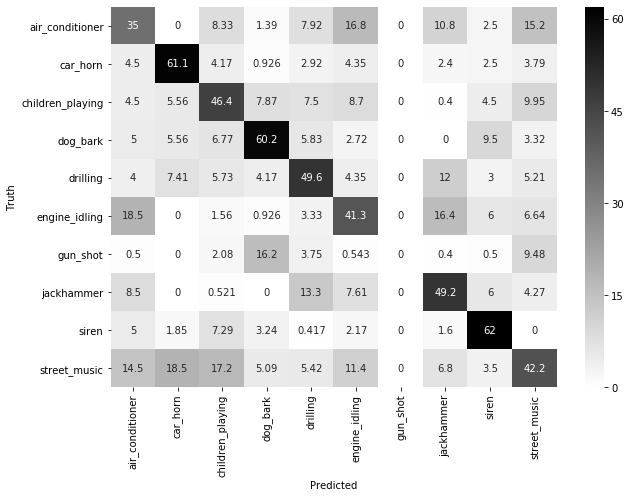

In [11]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']

cm = confusion_matrix(y_test_one_column, lr_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Pôr normalize='pred' é basicamente dizer que se quer obter a precisão.

In [12]:
print(metrics.classification_report(y_test_one_column, lr_predictions, digits=3,zero_division=0))

              precision    recall  f1-score   support

           0      0.350     0.345     0.347       203
           1      0.611     0.384     0.471        86
           2      0.464     0.486     0.475       183
           3      0.602     0.647     0.624       201
           4      0.496     0.578     0.534       206
           5      0.413     0.394     0.403       193
           6      0.000     0.000     0.000        72
           7      0.492     0.591     0.537       208
           8      0.620     0.752     0.679       165
           9      0.422     0.387     0.404       230

    accuracy                          0.488      1747
   macro avg      0.447     0.456     0.447      1747
weighted avg      0.465     0.488     0.474      1747



C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

In [13]:
# training a linear SVM classifier 
svm = SVC(C = 1).fit(x_train, y_train_one_column) 
svm_predictions = svm.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm.score(x_test, y_test_one_column) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test_one_column, svm_predictions)

0.5632512879221523


Text(68.09375, 0.5, 'Truth')

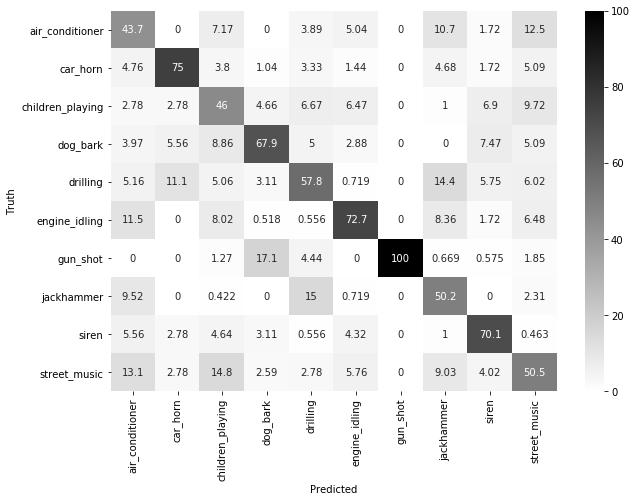

In [14]:
cm = confusion_matrix(y_test_one_column, svm_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
print(metrics.classification_report(y_test_one_column, svm_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.437     0.542     0.484       203
           1      0.750     0.314     0.443        86
           2      0.460     0.596     0.519       183
           3      0.679     0.652     0.665       201
           4      0.578     0.505     0.539       206
           5      0.727     0.523     0.608       193
           6      1.000     0.292     0.452        72
           7      0.502     0.721     0.592       208
           8      0.701     0.739     0.720       165
           9      0.505     0.474     0.489       230

    accuracy                          0.563      1747
   macro avg      0.634     0.536     0.551      1747
weighted avg      0.596     0.563     0.561      1747



# Random Forest

* number of decision trees used (n_estimators): 20
* criterion (gini  or entropy): gini
* seed used by the random state generator for randomizing the dataset (random_state): 42

In [16]:
# training a Random Forest classifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train_one_column)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
rf.score(x_test, y_test_one_column)

0.8483113909559244

In [18]:
rf_predictions = rf.predict(x_test)

Text(68.09375, 0.5, 'Truth')

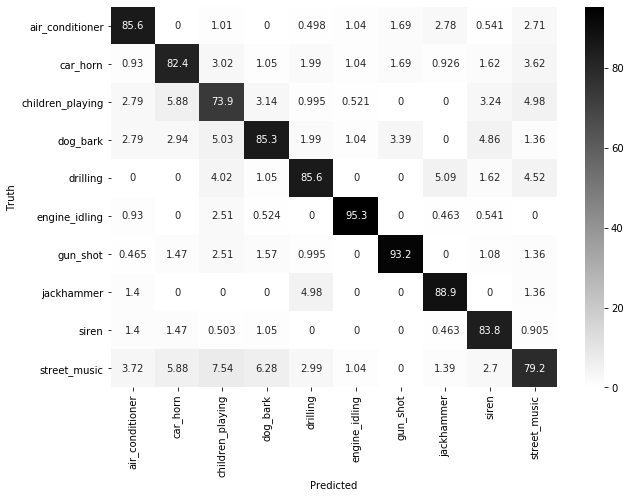

In [19]:
cm = confusion_matrix(y_test_one_column, rf_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
print(metrics.classification_report(y_test_one_column, rf_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.856     0.906     0.880       203
           1      0.824     0.651     0.727        86
           2      0.739     0.803     0.770       183
           3      0.853     0.811     0.832       201
           4      0.856     0.835     0.845       206
           5      0.953     0.948     0.951       193
           6      0.932     0.764     0.840        72
           7      0.889     0.923     0.906       208
           8      0.838     0.939     0.886       165
           9      0.792     0.761     0.776       230

    accuracy                          0.848      1747
   macro avg      0.853     0.834     0.841      1747
weighted avg      0.849     0.848     0.847      1747



# k Nearest Neighbors

In [21]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)
y_predicted_one_column = list()
for one_hot_array in knn_predictions:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)

cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='pred')*100

0.8654836863194046


Text(68.09375, 0.5, 'Truth')

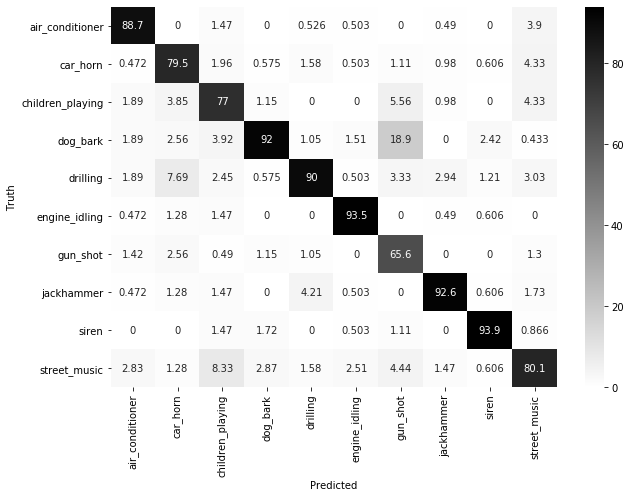

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
print(metrics.classification_report(y_test_one_column, y_predicted_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.887     0.926     0.906       203
           1      0.795     0.721     0.756        86
           2      0.770     0.858     0.811       183
           3      0.920     0.796     0.853       201
           4      0.900     0.830     0.864       206
           5      0.935     0.964     0.949       193
           6      0.656     0.819     0.728        72
           7      0.926     0.909     0.917       208
           8      0.939     0.939     0.939       165
           9      0.801     0.804     0.803       230

    accuracy                          0.865      1747
   macro avg      0.853     0.857     0.853      1747
weighted avg      0.869     0.865     0.866      1747



# Feed-forward Neural Network

In [24]:
num_labels = y_train.shape[1]

N=1

fnn = Sequential()

fnn.add(Dense(1024, input_shape=(13,)))
fnn.add(Activation('sigmoid'))
fnn.add(Dropout(0.5))

for i in range(N-1):
    fnn.add(Dense(1024))
    fnn.add(Activation('sigmoid'))
    fnn.add(Dropout(0.5))

fnn.add(Dense(num_labels))
fnn.add(Activation('softmax'))

fnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
fnn.fit(x_train, y_train, batch_size=32, epochs=1000)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





6985/6985 [==============================] - 1s 152us/step - loss: 1.8160 - acc: 0.3857
Epoch 2/1000
6985/6985 [==============================] - 1s 91us/step - loss: 1.4552 - acc: 0.4925
Epoch 3/1000
6985/6985 [==============================] - 0s 63us/step - loss: 1.3496 - acc: 0.5353
Epoch 4/1000
6985/6985 [==============================] - 0s 66us/step - loss: 1.2720 - acc: 0.5549
Epoch 5/1000
6985/6985 [==============================] - 1s 81us/step - loss: 1.1895 - acc: 0.5877
Epoch 6/1000
6985/6985 [==============================] - 1s 108us/step - loss: 1.1351 - acc: 0.6067
Epoch 7/1000
6985/6985 [==============================] - 0s 66us/step - loss: 1.1071 - acc: 0.6107
Epoch 8/1000
6985/6985 [==============================] - 0s 64us/step - lo

6985/6985 [==============================] - 0s 66us/step - loss: 0.4265 - acc: 0.8543
Epoch 129/1000
6985/6985 [==============================] - 1s 87us/step - loss: 0.4274 - acc: 0.8464
Epoch 130/1000
6985/6985 [==============================] - 1s 87us/step - loss: 0.4309 - acc: 0.8474
Epoch 131/1000
6985/6985 [==============================] - 0s 69us/step - loss: 0.4338 - acc: 0.8520: 0s - loss: 0.4239 - acc
Epoch 132/1000
6985/6985 [==============================] - 1s 81us/step - loss: 0.4435 - acc: 0.8467
Epoch 133/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.4255 - acc: 0.8513
Epoch 134/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.4289 - acc: 0.8490
Epoch 135/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.4595 - acc: 0.8418
Epoch 136/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.4284 - acc: 0.8544
Epoch 137/1000
6985/6985 [==============================] - 0s 66us/step

Epoch 288/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.3608 - acc: 0.8782
Epoch 289/1000
6985/6985 [==============================] - 1s 83us/step - loss: 0.3394 - acc: 0.8816
Epoch 290/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.3369 - acc: 0.8819
Epoch 291/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.3428 - acc: 0.8843
Epoch 292/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.3195 - acc: 0.8876
Epoch 293/1000
6985/6985 [==============================] - 1s 90us/step - loss: 0.3441 - acc: 0.8815
Epoch 294/1000
6985/6985 [==============================] - 1s 132us/step - loss: 0.3294 - acc: 0.8883
Epoch 295/1000
6985/6985 [==============================] - 1s 80us/step - loss: 0.3318 - acc: 0.8840
Epoch 296/1000
6985/6985 [==============================] - 1s 83us/step - loss: 0.3279 - acc: 0.8855
Epoch 297/1000
6985/6985 [==============================] - 1s 72us/step - loss: 

6985/6985 [==============================] - 1s 76us/step - loss: 0.3008 - acc: 0.8982
Epoch 448/1000
6985/6985 [==============================] - 1s 103us/step - loss: 0.2879 - acc: 0.9019
Epoch 449/1000
6985/6985 [==============================] - 0s 69us/step - loss: 0.3107 - acc: 0.8912
Epoch 450/1000
6985/6985 [==============================] - 1s 78us/step - loss: 0.2893 - acc: 0.9035
Epoch 451/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.2944 - acc: 0.8991
Epoch 452/1000
6985/6985 [==============================] - 0s 69us/step - loss: 0.2888 - acc: 0.8998
Epoch 453/1000
6985/6985 [==============================] - 0s 69us/step - loss: 0.2999 - acc: 0.8975
Epoch 454/1000
6985/6985 [==============================] - 1s 75us/step - loss: 0.3030 - acc: 0.8974
Epoch 455/1000
6985/6985 [==============================] - 1s 75us/step - loss: 0.2880 - acc: 0.9006
Epoch 456/1000
6985/6985 [==============================] - 1s 94us/step - loss: 0.2984 - acc: 0

6985/6985 [==============================] - 1s 102us/step - loss: 0.2628 - acc: 0.9061
Epoch 608/1000
6985/6985 [==============================] - 1s 91us/step - loss: 0.2765 - acc: 0.9019
Epoch 609/1000
6985/6985 [==============================] - 1s 87us/step - loss: 0.2714 - acc: 0.9061
Epoch 610/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.2885 - acc: 0.9052
Epoch 611/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.2765 - acc: 0.9072
Epoch 612/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.2855 - acc: 0.9044
Epoch 613/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.2571 - acc: 0.9098
Epoch 614/1000
6985/6985 [==============================] - 1s 89us/step - loss: 0.2714 - acc: 0.9075
Epoch 615/1000
6985/6985 [==============================] - 1s 102us/step - loss: 0.2822 - acc: 0.9075
Epoch 616/1000
6985/6985 [==============================] - 1s 95us/step - loss: 0.2895 - acc: 

6985/6985 [==============================] - 1s 155us/step - loss: 0.2681 - acc: 0.9098
Epoch 767/1000
6985/6985 [==============================] - 1s 166us/step - loss: 0.2585 - acc: 0.9168
Epoch 768/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.2696 - acc: 0.9058
Epoch 769/1000
6985/6985 [==============================] - 1s 76us/step - loss: 0.2377 - acc: 0.9157
Epoch 770/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.2379 - acc: 0.9181
Epoch 771/1000
6985/6985 [==============================] - 1s 75us/step - loss: 0.2727 - acc: 0.9078
Epoch 772/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.2458 - acc: 0.9157
Epoch 773/1000
6985/6985 [==============================] - 1s 100us/step - loss: 0.2373 - acc: 0.9164
Epoch 774/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.2461 - acc: 0.9151
Epoch 775/1000
6985/6985 [==============================] - 1s 194us/step - loss: 0.2522 - acc

6985/6985 [==============================] - 0s 61us/step - loss: 0.2441 - acc: 0.9190
Epoch 847/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.2523 - acc: 0.9188
Epoch 848/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.2416 - acc: 0.9180
Epoch 849/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.2470 - acc: 0.9160
Epoch 850/1000
6985/6985 [==============================] - 1s 79us/step - loss: 0.2499 - acc: 0.9154
Epoch 851/1000
6985/6985 [==============================] - 1s 101us/step - loss: 0.2548 - acc: 0.9161
Epoch 852/1000
6985/6985 [==============================] - 1s 114us/step - loss: 0.2352 - acc: 0.9223 0s - loss: 0.2390 - ac
Epoch 853/1000
6985/6985 [==============================] - 1s 87us/step - loss: 0.2583 - acc: 0.9145
Epoch 854/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.2532 - acc: 0.9161
Epoch 855/1000
6985/6985 [==============================] - 1s 105us/st

6985/6985 [==============================] - 1s 94us/step - loss: 0.2549 - acc: 0.9122
Epoch 927/1000
6985/6985 [==============================] - 1s 76us/step - loss: 0.2604 - acc: 0.9099
Epoch 928/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.2400 - acc: 0.9180
Epoch 929/1000
6985/6985 [==============================] - 1s 78us/step - loss: 0.2248 - acc: 0.9223
Epoch 930/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.2611 - acc: 0.9145
Epoch 931/1000
6985/6985 [==============================] - 1s 138us/step - loss: 0.2319 - acc: 0.9224
Epoch 932/1000
6985/6985 [==============================] - 1s 80us/step - loss: 0.2608 - acc: 0.9132
Epoch 933/1000
6985/6985 [==============================] - 1s 89us/step - loss: 0.2467 - acc: 0.9160
Epoch 934/1000
6985/6985 [==============================] - 1s 118us/step - loss: 0.2516 - acc: 0.9195
Epoch 935/1000
6985/6985 [==============================] - 1s 86us/step - loss: 0.2281 - acc: 

In [25]:
fnn_predictions = fnn.predict(x_test)

In [26]:
new_fnn_predictions=list()
for i in fnn_predictions:
    maximum = max(i)
    new_list = [int(element==maximum) for element in i]
    new_fnn_predictions.append(new_list)
fnn_predictions_one_column = list()
for one_hot_array in new_fnn_predictions:
    fnn_predictions_one_column.append(str(np.argmax(one_hot_array)))
fnn_predictions_one_column = np.array(fnn_predictions_one_column)

Text(68.09375, 0.5, 'Truth')

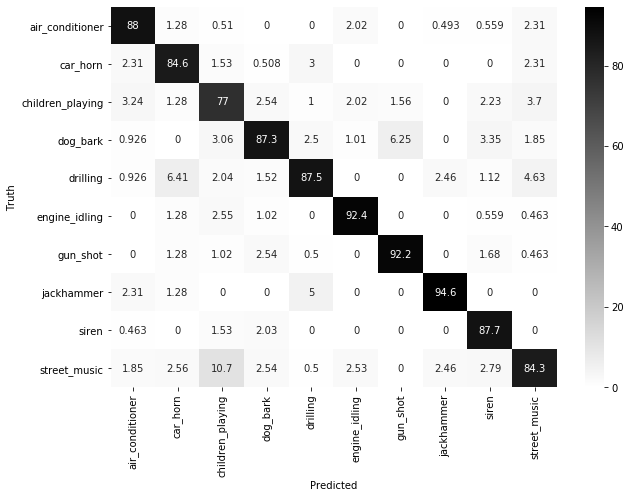

In [27]:
cm = confusion_matrix(y_test_one_column, fnn_predictions_one_column, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
print(metrics.classification_report(y_test_one_column, fnn_predictions_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.880     0.936     0.907       203
           1      0.846     0.767     0.805        86
           2      0.770     0.825     0.797       183
           3      0.873     0.856     0.864       201
           4      0.875     0.850     0.862       206
           5      0.924     0.948     0.936       193
           6      0.922     0.819     0.868        72
           7      0.946     0.923     0.934       208
           8      0.877     0.952     0.913       165
           9      0.843     0.791     0.816       230

    accuracy                          0.874      1747
   macro avg      0.876     0.867     0.870      1747
weighted avg      0.875     0.874     0.874      1747



## Guardar modelos treinados

ver se guardou bem subtraindo a previsão feita aqui pela do modelo loaded

In [29]:
joblib.dump(lr, 'lr13.pkl')

['lr13.pkl']

In [30]:
loadedlr=joblib.load('lr13.pkl')

loadedlrpredictions=loadedlr.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedlrpredictions, lr_predictions))

Are the 2 predicted arrays the same?: True


In [31]:
joblib.dump(svm, 'svm13.pkl')

['svm13.pkl']

In [32]:
loadedsvm=joblib.load('svm13.pkl')

loadedsvmpredictions=loadedsvm.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedsvmpredictions, svm_predictions))

Are the 2 predicted arrays the same?: True


In [33]:
joblib.dump(rf, 'rf13.pkl')

['rf13.pkl']

In [34]:
loadedrf=joblib.load('rf13.pkl')

loadedrfpredictions=loadedrf.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedrfpredictions, rf_predictions))

Are the 2 predicted arrays the same?: True


In [35]:
joblib.dump(knn, 'knn13.pkl')

['knn13.pkl']

In [36]:
loadedknn=joblib.load('knn13.pkl')

loadedknnpredictions=loadedknn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedknnpredictions, knn_predictions))

Are the 2 predicted arrays the same?: True


In [37]:
joblib.dump(fnn, 'fnn13.pkl')

['fnn13.pkl']

In [38]:
loadedfnn=joblib.load('fnn13.pkl')

loadedfnnpredictions=loadedfnn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedfnnpredictions, fnn_predictions))

Are the 2 predicted arrays the same?: True
